### Initalizing spark

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Jonas_rentalPrice-Copy1") \
    .config("spark.executor.memory", '4g') \
    .config('spark.executor.cores', '1') \
    .config('spark.cores.max', '1') \
    .config("spark.driver.memory",'1g') \
    .getOrCreate()

sc = spark.sparkContext
sqlCtx = SQLContext(sc)

Downloading the data as a pandas data frame.

In [2]:
train_data_pd = pd.read_json("data/train.json")

Taking a look at the data.

In [8]:
train_data_pd

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street,medium
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street,low
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street,low
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace,medium
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th,low


Create a pySpark DataFrame of the pandas Data Frame.

In [4]:
train_data_df = sqlCtx.createDataFrame(train_data_pd)

Printing the schema. Seems to be ok for most part. The `created` should be changed from string to time object.

In [5]:
train_data_df.printSchema()

root
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: long (nullable = true)
 |-- building_id: string (nullable = true)
 |-- created: string (nullable = true)
 |-- description: string (nullable = true)
 |-- display_address: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- latitude: double (nullable = true)
 |-- listing_id: long (nullable = true)
 |-- longitude: double (nullable = true)
 |-- manager_id: string (nullable = true)
 |-- photos: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- price: long (nullable = true)
 |-- street_address: string (nullable = true)
 |-- interest_level: string (nullable = true)



Show the first row in the pySpark Data Frame.

In [6]:
train_data_df.show(1)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
+---------+--------+--------------------+-------------------+--------------------+--------------

Printing the `bathrooms` column and sorting on the most frequent number of bathrooms.

In [7]:
train_data_df.groupBy('bathrooms').count().sort('count', ascending=False).show()

+---------+-----+
|bathrooms|count|
+---------+-----+
|      1.0|39422|
|      2.0| 7660|
|      3.0|  745|
|      1.5|  645|
|      0.0|  313|
|      2.5|  277|
|      4.0|  159|
|      3.5|   70|
|      4.5|   29|
|      5.0|   20|
|      5.5|    5|
|      6.0|    4|
|      7.0|    1|
|      6.5|    1|
|     10.0|    1|
+---------+-----+



Checking out the apartment with 10 bathrooms.

In [8]:
train_data_df.filter(train_data_df["bathrooms"] == 10.0).show()

+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+---------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------+--------------+
|     10.0|       2|424f8014bddc288d2...|2016-04-09 04:34:31|***The building?s...|       W 52 St.|[Doorman, Elevato...| 40.7633|   6849204| -73.9849|0c71a59cb70215fbf...|[https://photos.r...| 3600|  260 W 52 St.|           low|
+---------+--------+--------------------+-------------------+--------------------+------

We we that it is a room with 2 bedrooms. Highly likely that it is a typo. We continue to check out the rental with 7 and 6.5 bathrooms.

In [14]:
train_data_df.filter((train_data_df["bathrooms"] == 7.0) | (train_data_df["bathrooms"] == 6.5) ).show()

+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|     display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+--------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      6.5|       7|3be1175591e290053...|2016-06-22 03:15:54|This landmark Eng...|206 Upper Mountai...|[Garage, Garden, ...| 40.8336|   7198431|  -74.216|1d019cccf631394cd...|[https://photos.r...|14500|206 Upper Mountai...|           low|
|      7.0|       5|                   0|201

We see that these are way more expensive than the rental with 10 bathrooms which further the suspision that it is a typo. 

Printing the `bedrooms` column and sorting on the most frequent number of bedrooms.

In [15]:
train_data_df.groupBy('bedrooms').count().sort('count', ascending=False).show()

+--------+-----+
|bedrooms|count|
+--------+-----+
|       1|15752|
|       2|14623|
|       0| 9475|
|       3| 7276|
|       4| 1929|
|       5|  247|
|       6|   46|
|       7|    2|
|       8|    2|
+--------+-----+



Check out the 8 room apartments.

In [16]:
train_data_df.filter((train_data_df["bedrooms"] == 8)).show()

+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description| display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|  street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+----------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+----------------+--------------+
|      4.0|       8|2d51ec2a54cf05468...|2016-06-25 06:09:20|Gorgeous 8 bedroo...|      Greene Ave|[Hardwood Floors,...| 40.6881|   7217045| -73.9553|9ba3641676cc717a8...|                  []| 6500|  393 Greene Ave|           low|
|      3.0|       8|f8bff653aae7c7555...|2016-06-13 02:47:37|Please note tha

We check for the `building_id` and conclude that we have 8286 missing values here.

In [17]:
train_data_df.groupBy('building_id').count().sort('count', ascending=False).show(5)

+--------------------+-----+
|         building_id|count|
+--------------------+-----+
|                   0| 8286|
|96274288c84ddd7d5...|  275|
|11e1dec9d14b1a9e5...|  215|
|80a120d6bc3aba97f...|  213|
|bb8658a3e432fb62a...|  212|
+--------------------+-----+
only showing top 5 rows



Displaying the `created` column.

In [18]:
train_data_df[["created"]].show(5)

+-------------------+
|            created|
+-------------------+
|2016-06-24 07:54:24|
|2016-06-12 12:19:27|
|2016-04-17 03:26:41|
|2016-04-18 02:22:02|
|2016-04-28 01:32:41|
+-------------------+
only showing top 5 rows



Changing the `created` column to timestamp objects instead of strings.

In [19]:
train_data_df = train_data_df.withColumn("created", F.to_timestamp("created"))

We create a coulm called `Day_of_week` which contains the day of the week the rental was created.

In [20]:
day_of_week = train_data_df.withColumn("Day_of_week", F.dayofweek(train_data_df["created"]))
day_of_week = day_of_week[["Day_of_week"]]
day_of_week.show(5)

+-----------+
|Day_of_week|
+-----------+
|          6|
|          1|
|          1|
|          2|
|          5|
+-----------+
only showing top 5 rows



We want to plot the count of the different days that the rental was created.

In [21]:
day_of_week_pd = day_of_week.toPandas()

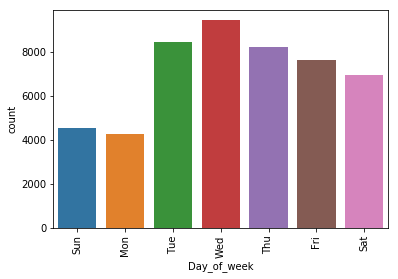

In [22]:
ax = sns.countplot(x="Day_of_week", data = day_of_week_pd)
ax.set_xticklabels(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], rotation='vertical', fontsize=10)
plt.show()

We create a data frame with `longitude` and `latitude` in order to plot the positioning of the rental unit on a map.

In [23]:
long_lat_df = train_data_df[["longitude", "latitude"]]

In [24]:
long_lat_df.show(5)

+---------+--------+
|longitude|latitude|
+---------+--------+
| -73.9425| 40.7145|
| -73.9667| 40.7947|
| -74.0018| 40.7388|
| -73.9677| 40.7539|
| -73.9493| 40.8241|
+---------+--------+
only showing top 5 rows



Printing a statistic summary, mostly to see if there were any strange values. Which there were since we dont think that there are any rental units with longitude and latitude = 0.0

In [25]:
long_lat_df.describe().show()

+-------+------------------+------------------+
|summary|         longitude|          latitude|
+-------+------------------+------------------+
|  count|             49352|             49352|
|   mean|-73.95571552115403| 40.74154482290473|
| stddev|1.1779119215716698|0.6385353439544786|
|    min|          -118.271|               0.0|
|    max|               0.0|           44.8835|
+-------+------------------+------------------+



We see how many rental units that have longitude and latitude = 0.0

In [26]:
print("Number of observations with missing longitude: {}" .format(long_lat_df.filter(long_lat_df["longitude"] == 0.0).count()))
print("Number of observations with missing latitude: {}" .format(long_lat_df.filter(long_lat_df["latitude"] == 0.0).count()))

Number of observations with missing longitude: 12
Number of observations with missing latitude: 12


Could these be the same observations?

In [27]:
print("Number of observations with missing longitude and latitude: {}".format(long_lat_df.filter((long_lat_df["latitude"] == 0.0) & (long_lat_df["longitude"] == 0.0)).count()))

Number of observations with missing longitude and latitude: 12


Yes they are... So how many are remaining?

In [28]:
long_lat_df.filter(long_lat_df["latitude"] != 0.0).count()

49340

To plot the apartments we use the package `folium` which can make interactive plots and we can get more information of the rental units in the plot.

Inspiration from blogpost: https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb

In [13]:
#!pip install --upgrade folium
import folium

    100% |████████████████████████████████| 92kB 5.6MB/s ta 0:00:011


We create a function that places each of the units on the map. The color of the apartment corresponds to the factor `interest_level` which has not been investigated thoroughly yet. The size of the circle is based on the price which can be displayed by *klicking* the circle, along with the `street_address`.

In [14]:
def plot_rental_locatinos(rental_locatinos):
        # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

            
    for index, row in rental_locatinos.iterrows():
        
            popup_text = "{}<br> Price: {}<br>"
            popup_text = popup_text.format(row["street_address"], row["price"])
            
            if row["interest_level"] == 'high':
                color="#007849" # green
            if row["interest_level"] == 'medium':
                color="#FFCE00" # yellow 
            if row["interest_level"] == 'low':
                color="#FFCE99" # orange
                
            radius = row["price"]/1000
        
            folium.CircleMarker(location=(row["latitude"],
                                      row["longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

Since our data set is too big for all rental units to be displayed a subsample of 1000 units are changed into a pandas data frame which is then plotted using the above constructed function `plot_rental_locatinos`.

In [15]:
sample_pd = train_data_pd.sample(n = 1000)

The user constructed function `plot_rental_locatinos`

In [16]:
plot_rental_locatinos(sample_pd)

We want to explode and split on the column `features`. So that each feature gets it's own column with binary values.

In [33]:
list = train_data_df[["features"]].collect()[1][0]
list

['Doorman', 'Elevator', 'Fitness Center', 'Cats Allowed', 'Dogs Allowed']

We first have to handele the rentals with missing featurses by adding `missing` as a feature. Here are the 2 first listings with missing features.

In [34]:
train_data_df.filter(F.size("features")==0).show(2)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|      []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      2.0|       4|38a913e46c94a7f46...|2016-04-19 04:24:47|                    |   West 18th S

In [35]:
def fillMissing(features):
    if(len(features) == 0): return ['Missing Feature']
    else : return features

fill_missing_udf = F.udf(fillMissing)

train_data_df2 = train_data_df.withColumn("features" , fill_missing_udf(F.col("features")))

In [36]:
train_data_df2[["features"]].show(10)

+--------------------+
|            features|
+--------------------+
|   [Missing Feature]|
|[Doorman, Elevato...|
|[Laundry In Build...|
|[Hardwood Floors,...|
|           [Pre-War]|
|   [Missing Feature]|
|[prewar, elevator...|
|[Doorman, Elevato...|
|[Cats Allowed, Do...|
|[Dishwasher, Hard...|
+--------------------+
only showing top 10 rows



In [38]:
train_data_df2[["features"]].collect()[1][0]

'[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]'

In [ ]:
train_data_df2.withColumn("ex_features", F.explode(train_data_df2.features)).show(5)

In [ ]:
train_data_df.withColumn("ex_features", F.explode(train_data_df.features)).show(5)

### Georgia's work

I will explore the descriptions

In [18]:
train_data_df.show(3)

+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|bathrooms|bedrooms|         building_id|            created|         description|    display_address|            features|latitude|listing_id|longitude|          manager_id|              photos|price|      street_address|interest_level|
+---------+--------+--------------------+-------------------+--------------------+-------------------+--------------------+--------+----------+---------+--------------------+--------------------+-----+--------------------+--------------+
|      1.5|       3|53a5b119ba8f7b61d...|2016-06-24 07:54:24|A Brand New 3 Bed...|Metropolitan Avenue|                  []| 40.7145|   7211212| -73.9425|5ba989232d0489da1...|[https://photos.r...| 3000|792 Metropolitan ...|        medium|
|      1.0|       2|c5c8a357cba207596...|2016-06

In [22]:
# Check out this column
train_data_df.select(["description"]).show(20)

+--------------------+
|         description|
+--------------------+
|A Brand New 3 Bed...|
|                    |
|Top Top West Vill...|
|Building Amenitie...|
|Beautifully renov...|
|                    |
|Stunning unit wit...|
|This huge sunny ,...|
|<p><a  website_re...|
|This is a spaciou...|
|New to the market...|
|Check out this on...|
|***LOW FEE. Beaut...|
|Lincoln Square's ...|
|Spacious 1-Bedroo...|
|Stunning  full re...|
|East Village is a...|
|*Location: Thayer...|
|                    |
|                    |
+--------------------+
only showing top 20 rows



At first glance, it looks like we've got some missing values, use of special characters (** for instance), and capital letters might be important.

In [36]:
train_data_df.select(["description"]).count()

49352

In [56]:
train_data_rdd = train_data_df.rdd
train_data_rdd.take(2)

[Row(bathrooms=1.5, bedrooms=3, building_id='53a5b119ba8f7b61d4e010512e0dfc85', created='2016-06-24 07:54:24', description="A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ", display_address='Metropolitan Avenue', features=[], latitude=40.7145, listing_id=7211212, longitude=-73.9425, manager_id='5ba989232d0489da1b5f2c45f6688adc', photos=['https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg', 'https://photos.renthop.com/2/7211212_7dfc4

In [69]:
train_data_rdd.map(lambda x: x[4]).take(5)

["A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ",
 '        ',
 'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by man

In [72]:
review = train_data_rdd.filter(lambda r:r[4] != '"') \
.filter(lambda r:r[1] != '') # 
review.take(2)
# This doesn't work, or we have a description for every property...

[Row(bathrooms=1.5, bedrooms=3, building_id='53a5b119ba8f7b61d4e010512e0dfc85', created='2016-06-24 07:54:24', description="A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ", display_address='Metropolitan Avenue', features=[], latitude=40.7145, listing_id=7211212, longitude=-73.9425, manager_id='5ba989232d0489da1b5f2c45f6688adc', photos=['https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg', 'https://photos.renthop.com/2/7211212_7dfc4

In [75]:
awesomes = review.filter(lambda x: 'awesome' in x[4])
awesomes.take(2)

[Row(bathrooms=2.0, bedrooms=2, building_id='8303c099effd327c015824badf138765', created='2016-04-09 03:56:28', description='True W Village, Gut Renovated 2-Bedroom 2 bath home at pristine elevator building with awesomeness for location! <br /><br />Great Living/Dining Area, Fully-equipped granite Kitchen with Stainless Steel appliances including a dishwasher and wine cooler, <br /><br />Marble Baths with amazing details! <br /><br />Tons of closet space everywhere!  Queen Size Bedrooms with TONS of storage!!! <br /><br />Call or email Lucas for an exclusive showing of this place and many more listings in NYC.  <br /><br />Bond New York is a real estate broker that supports equal housing opportunity.<p><a  website_redacted ', display_address='W 12 Street', features=['Elevator', 'Laundry in Unit', 'Dishwasher', 'Hardwood Floors', 'Dogs Allowed', 'Cats Allowed'], latitude=40.7373, listing_id=6848609, longitude=-74.0042, manager_id='ffd7307e4924587b30ec014a95db1362', photos=['https://photo

In [76]:
desc = review.map(lambda r: r[4]) # First step: take only the description column
desc.take(3)

["A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ",
 '        ',
 'Top Top West Village location, beautiful Pre-war building with laundry in the basement and live in super!<br/><br/>Apartment features a large bedroom with closet. Separate living room, kitchen features granite tops, dishwasher and microwave included, marble bathroom and hardwood flooring. Building is very well maintained and conveniently located near A,C,E,L,1,2,3 trains. Surrounded by man

In [77]:
words = desc.flatMap(lambda x: x.split(" ")) # split on spaces
words.take(10)

['A',
 'Brand',
 'New',
 '3',
 'Bedroom',
 '1.5',
 'bath',
 'ApartmentEnjoy',
 'These',
 'Following']

In [79]:
words2 = words.map(lambda x: x.strip()) # not necessary I don't think
words2.take(10)  

# Is there a way to split on caps?

['A',
 'Brand',
 'New',
 '3',
 'Bedroom',
 '1.5',
 'bath',
 'ApartmentEnjoy',
 'These',
 'Following']

In [80]:
topwords = words2.map(lambda x: (x,1)) # add a count for each category so we can add them up
topwords.take(10)

[('A', 1),
 ('Brand', 1),
 ('New', 1),
 ('3', 1),
 ('Bedroom', 1),
 ('1.5', 1),
 ('bath', 1),
 ('ApartmentEnjoy', 1),
 ('These', 1),
 ('Following', 1)]

In [82]:
topwords2 = topwords.reduceByKey(lambda x,y: x+y)\
.map(lambda x: (x[1], x[0]))\
.sortByKey(False)

topwords2.take(10) # Most of these are useless, so I should use the stopwords function

[(140933, ''),
 (135346, 'and'),
 (115420, '/><br'),
 (85570, 'the'),
 (83585, 'a'),
 (63052, 'to'),
 (59579, 'with'),
 (56989, 'in'),
 (53371, 'of'),
 (42829, 'is'),
 (35409, 'website_redacted'),
 (26656, 'for'),
 (24327, 'apartment'),
 (22447, 'or'),
 (19406, 'on'),
 (18840, 'this'),
 (16731, 'The'),
 (16589, '/><p><a'),
 (16182, 'building'),
 (16064, 'from')]

In [83]:
topwords2.take(100)

[(140933, ''),
 (135346, 'and'),
 (115420, '/><br'),
 (85570, 'the'),
 (83585, 'a'),
 (63052, 'to'),
 (59579, 'with'),
 (56989, 'in'),
 (53371, 'of'),
 (42829, 'is'),
 (35409, 'website_redacted'),
 (26656, 'for'),
 (24327, 'apartment'),
 (22447, 'or'),
 (19406, 'on'),
 (18840, 'this'),
 (16731, 'The'),
 (16589, '/><p><a'),
 (16182, 'building'),
 (16064, 'from'),
 (15915, 'kitchen'),
 (15415, 'bedroom'),
 (15031, 'This'),
 (14506, 'at'),
 (14387, '-'),
 (14323, 'you'),
 (14070, '&'),
 (13776, 'that'),
 (13731, '2'),
 (13424, 'an'),
 (13422, 'your'),
 (13207, 'New'),
 (12704, 'AND'),
 (12676, 'has'),
 (11678, 'are'),
 (11596, 'steel'),
 (11416, 'hardwood'),
 (11377, 'A'),
 (11305, 'features'),
 (11300, '1'),
 (10829, 'stainless'),
 (10638, 'living'),
 (10213, 'all'),
 (10093, 'THE'),
 (9809, 'new'),
 (9374, 'renovated'),
 (9256, 'IN'),
 (9180, 'York'),
 (9144, 'great'),
 (8931, 'large'),
 (8873, 'TO'),
 (8538, 'located'),
 (8457, 'me'),
 (8400, 'full'),
 (8186, 'room'),
 (7984, 'one'),
 

* other things to do -- create a column that has a variable for contains/does not contain description. Also word count. 
* Need to remove stop words, potentially use inverse importance thing to identify good words. Then look at association of words with interest. 
* Finally, check out tuples/doubles that are useful. Eg: "equal opportunity lender"

In [11]:
train_data_rdd = train_data_df.rdd
train_data_rdd.take(3)

[Row(bathrooms=1.5, bedrooms=3, building_id='53a5b119ba8f7b61d4e010512e0dfc85', created='2016-06-24 07:54:24', description="A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted ", display_address='Metropolitan Avenue', features=[], latitude=40.7145, listing_id=7211212, longitude=-73.9425, manager_id='5ba989232d0489da1b5f2c45f6688adc', photos=['https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg', 'https://photos.renthop.com/2/7211212_7dfc4

In [ ]:
def feature_processor(row):
    return [row[ticker] for ticker in row.__fields__]

In [ ]:
train_data_rdd.map(lambda row: feature_processor(row)).take(1)

In [ ]:
import re

Removes numbers of adresses?

In [ ]:
def addressProcessor(address):
    addressTokens = address.split(" ")
    result = []
    for ticker in addressTokens:
        if re.match("^[0-9]+$",ticker):
            continue
        else:
            result.append(ticker)
    return " ".join(result).lower().strip().replace(".","")

In [ ]:
addressProcessor("a jda 12")

In [ ]:
resultDict = dict()
display_address = train_data_pd.get("display_address")
for i in display_address:
    resultDict[i] = addressProcessor(i)
resultDict